# 动态U-Net

该模块从ImageNet预训练的任何骨干网构建动态U-Net，自动推断中间大小。

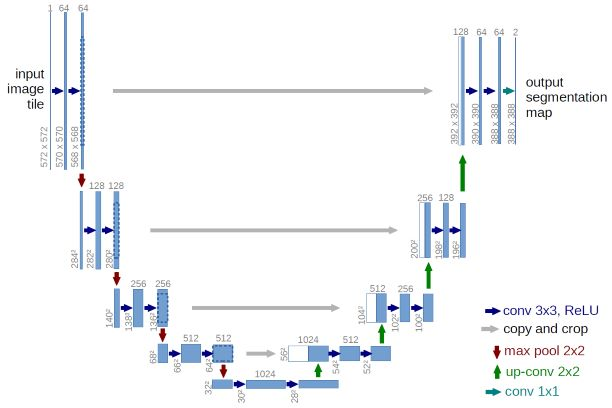

这是原来的U-Net。 这里的区别在于左侧部分是预训练模型。

---

**class DynamicUnet**

`DynamicUnet(*args, **kwargs) :: PrePostInitMeta :: SequentialEx`

从给定的体系结构创建U-Net。

这个U-Net将位于编码器（可以是预训练模型）的顶部，并且最终输出为n_classes。 在初始化期间，它使用Hooks通过在模型中传递虚拟输入并自动创建向上路径来确定中间要素大小。

blur用于避免每层的棋盘格工件，blur_final特定于最后一层。 self_attention确定我们是否在结束前在第三个块使用自我关注图层。 如果传递了y_range，则最后一次激活将通过重新缩放到该范围的sigmoid。 last_cross确定我们是否使用与模型的直接输入的交叉连接，并且在这种情况下，如果我们对该跳过连接使用瓶颈，则使用瓶标志。

---

**class UnetBlock**

`UnetBlock(*args, **kwargs) :: PrePostInitMeta :: Module`

一个准UNet块，使用PixelShuffle_ICNR上采样。

该块接收要上采样的最后一个块的输出（大小up_in_c）和来自编码器的中间层的激活特征（大小x_in_c，这是横向连接）。 挂钩设置为此中间层以存储此块所需的输出。 final_div确定我们是否使用上采样将要素数除以2，模糊是为了避免棋盘瑕疵。 如果设置了泄漏，则使用斜率等于该参数而不是ReLU的泄漏ReLU，self_attention确定我们是否使用自注意层。 kwargs传递给conv_layer。